## learning-AI101 : abalone classification (DL)
### 전복 데이터를 Dense layer struction을 통한 DNN 방식의 classification

<br>

- **임규연 (lky473736)**
- 2024.08.02.에 문서 작성
- **dataset** : https://archive.ics.uci.edu/dataset/1/abalone
- **data abstract** : Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task.  Other measurements, which are easier to obtain, are used to predict the age.  Further information, such as weather patterns and location (hence food availability) may be required to solve the problem. From the original data examples with missing values were removed (the majority having the predicted value missing), and the ranges of the continuous values have been scaled for use with an ANN (by dividing by 200).

------

-----

## <span id='dl'><mark>DL</mark></span>
    
deep learning으로 abalone을 classification한다. 목차는 아래와 같다.

- **1. EDA and preprocessing**
- **2. SGDClassifier를 통한 ML에서의 확률적 경사 하강법 적용**
- **3. ANN (fully connected)**
- **4. DNN**


In [151]:
# 라이브러리 import

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

------

### 1. EDA and preprocessing
- 데이터 시각화 및 필요한 정보를 얻어낸다.
- 결측치 제거, outlier 제거 등의 데이터 전처리를 수행한다.

In [ ]:
# 데이터 읽기

header = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 
          'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']
df = pd.read_csv("./data/abalone/abalone.csv", names = header)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [153]:
# df의 행의 갯수, 열의 갯수, feature 파악

df.shape, df.columns

((4177, 9),
 Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
        'Viscera_weight', 'Shell_weight', 'Rings'],
       dtype='object'))

In [154]:
# df의 기본적인 정보 및 기초통계량

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


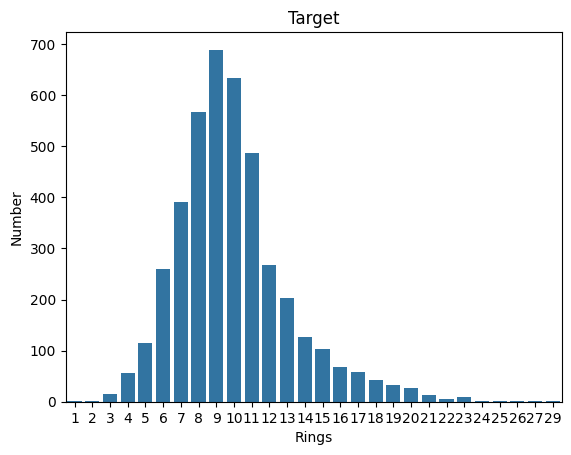

In [155]:
# seaborn countplot을 통한 각 레이블 도수 확인

sns.countplot (data=df, x='Rings')
plt.xlabel ("Rings")
plt.ylabel ("Number")
plt.title ("Target")
plt.show()

In [156]:
# target의 class 도수를 확인 (숫자로)

df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [157]:
# Sex 특성 제거 및 Rings의 재구성

print (df.columns)
df = df.drop(columns=['Sex']) # Sex 특성 제거

for ix in df.index :
    row = df.loc[ix]
    if row.Rings <= 8 :
        df.loc[ix, 'Rings'] = 0 # 'young'
    elif row.Rings >= 11 :
        df.loc[ix, 'Rings'] = 2 # 'old'
    elif row.Rings >=9 and row.Rings <= 10 :
        df.loc[ix, 'Rings'] = 1 # 'medium'
        
df.head()

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')


,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,2
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0


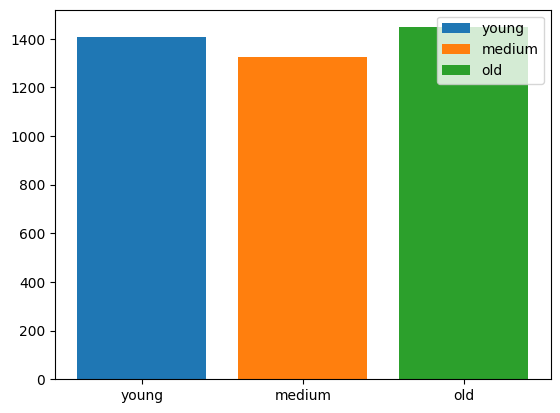

In [158]:
# 각 클래스별 갯수를 시각화

unique, counts = np.unique(df['Rings'].to_numpy(), return_counts=True)
class_counts = dict(zip(unique, counts))

plt.bar("young", class_counts[0], label="young")
plt.bar("medium", class_counts[1], label="medium")
plt.bar("old", class_counts[2], label="old")
plt.legend()
plt.show()

In [159]:
# 결측치 확인

df.isnull().sum()

Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [160]:
# 결측치 제거

df = df.dropna()
df.isnull().sum()

Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [ ]:
# pairplot를 사용해 각 feature의 상관관계 알아보기

import warnings 
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

sns.pairplot(df, vars=('Length', 'Diameter', 'Height', 
                       'Whole_weight', 'Shucked_weight', 'Viscera_weight', 
                       'Shell_weight', 'Rings',), hue ='Rings')
plt.show()

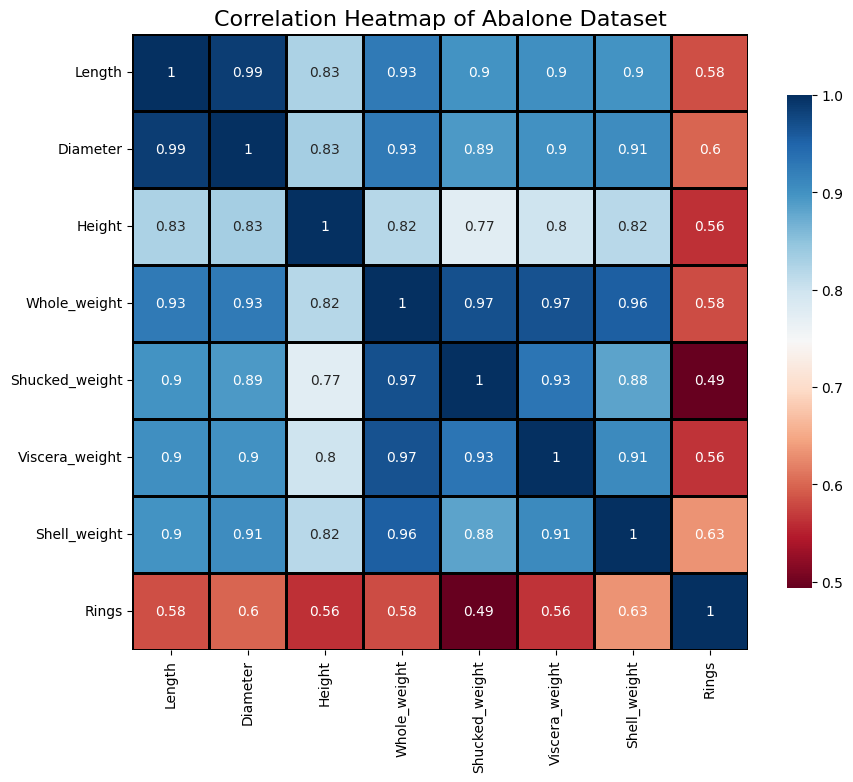

In [162]:
# seaborn을 통하여 heatmap 시각화

correlation_matrix = df[['Length', 'Diameter', 'Height', 
                         'Whole_weight', 'Shucked_weight', 
                         'Viscera_weight', 'Shell_weight', 'Rings']].corr() # feature (target 제외)
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', square=True,
            linewidths=1, linecolor='black', cbar_kws={"shrink": 0.8})

plt.title('Correlation Heatmap of Abalone Dataset', fontsize=16)
plt.show()

/var/folders/_z/gryfr07n59jgb3wrd062h1ym0000gn/T/ipykernel_50429/3231520240.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist (ax = ax)


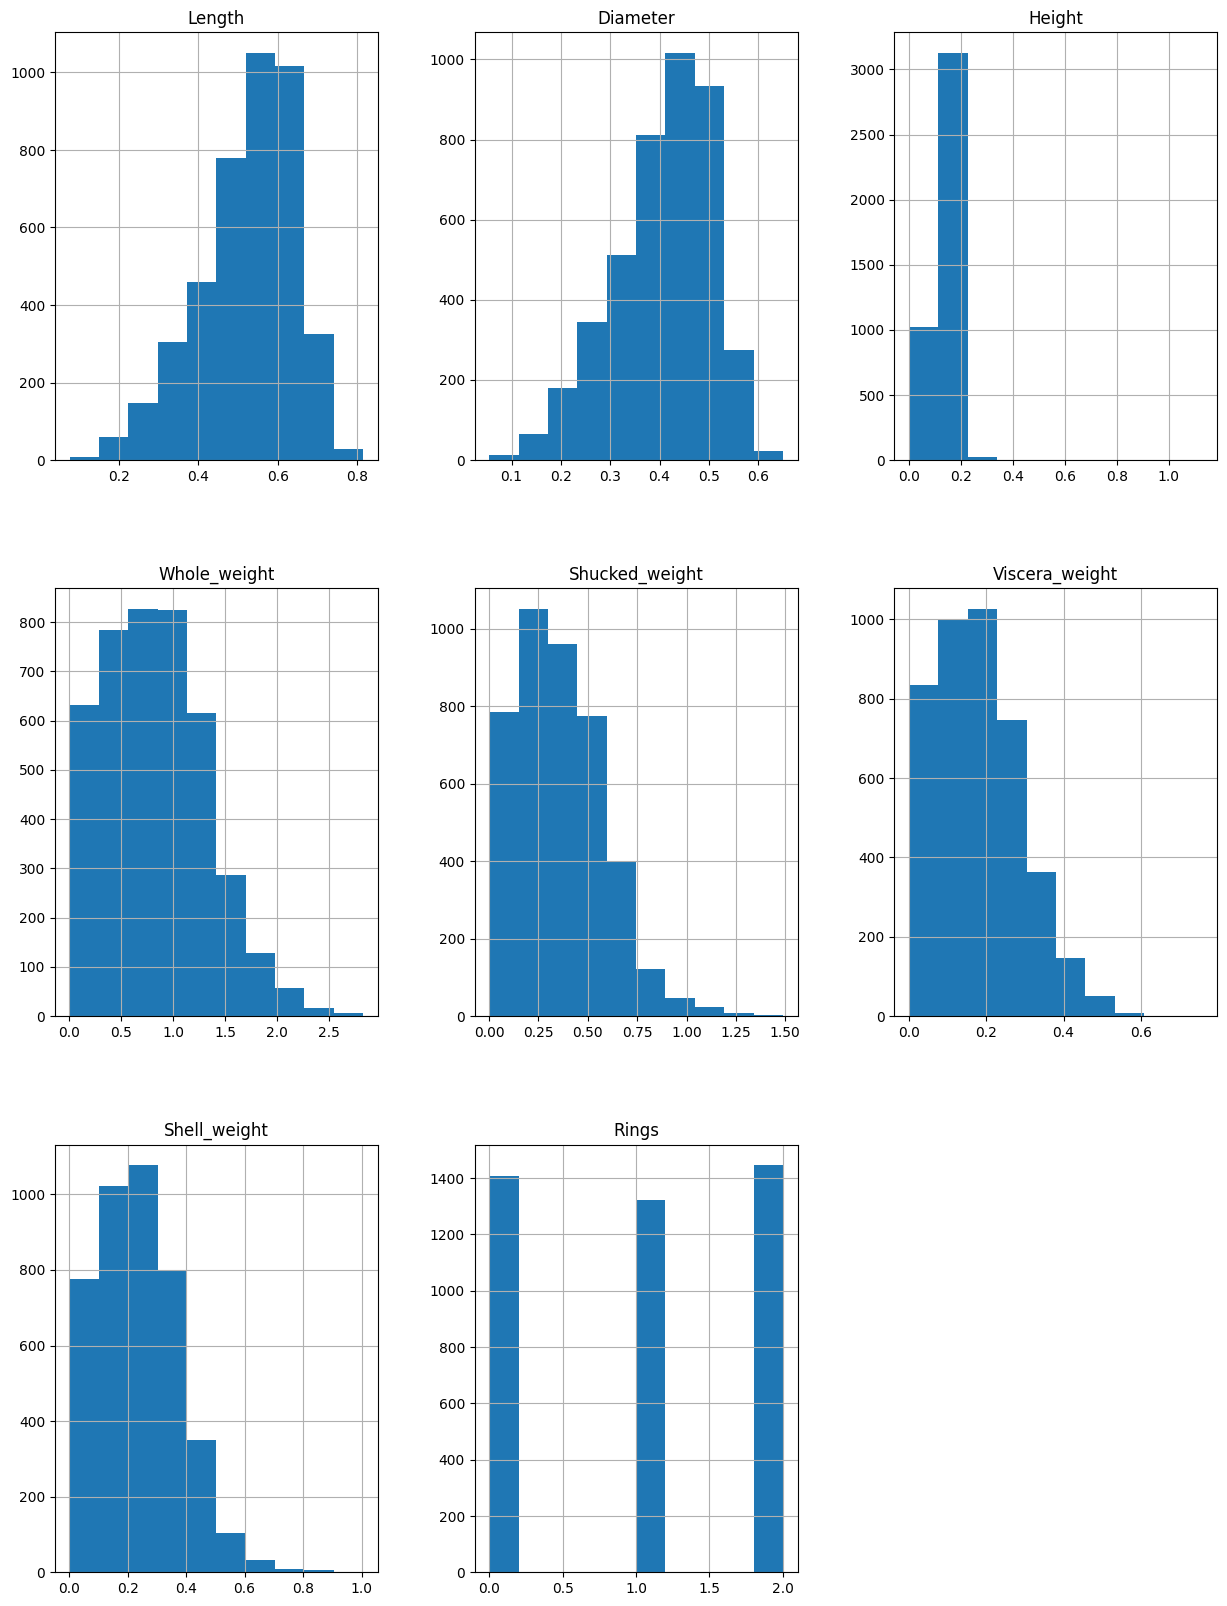

In [163]:
# 각 컬럼별 히스토 그램 확인

fig = plt.figure(figsize = (15, 20))
ax = fig.gca()
df.hist (ax = ax)
plt.show()

In [164]:
# abalone_input, abalone_target 만들기

abalone_input = df.drop('Rings', axis=1)
abalone_target = df['Rings']

print(abalone_target.value_counts())
abalone_input.head()

Rings
2    1447
0    1407
1    1323
Name: count, dtype: int64


,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


-------

### 2. SGDClassifier를 통한 ML에서의 확률적 경사 하강법 적용
deep learning을 하기 전, deep learning의 weight 및 bias 조정법인 **SGD (Stochastic Gradient Descent)** 를 scikit-learn으로 구현 후 classification score를 확인해본다. parameter는 random search를 통하여 최적화할 것이며, 자세한 조정범위는 아래에 서술한다.
- loss function : log_loss (logistic regression (sigmoid))
- max_iter : 10~50 (randint)

In [165]:
# data split 및 normalization

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

raisin_input = df[df.columns[:-1]]
raisin_target = df[df.columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(abalone_input, abalone_target, 
                                                   stratify=abalone_target, test_size=0.2)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [166]:
# random search를 통한 hyperparameter tuning

from sklearn.linear_model import SGDClassifier
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV

param = {
    'max_iter' : randint(10, 50)
}

sc = SGDClassifier(loss='log_loss')
rs = RandomizedSearchCV(sc, param, n_iter=50, n_jobs=-1)
rs.fit (X_train_scaled, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reache

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reache

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reache

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reache

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reache

RandomizedSearchCV(estimator=SGDClassifier(loss='log_loss'), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_iter': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x16fdd5a50>})

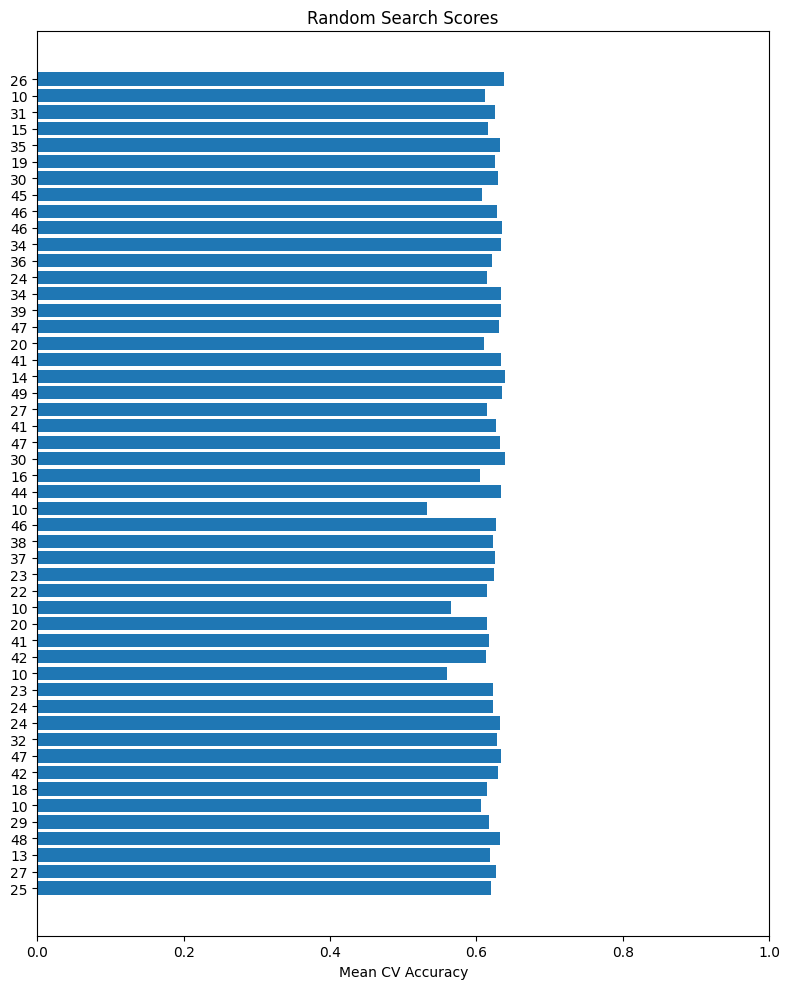

In [167]:
# 하이퍼파라미터 조합별 성능 시각화

# 각 하이퍼파라미터 조합별 교차 검증 스코어 가져오기
results = rs.cv_results_
mean_scores = results['mean_test_score']
params = results['params']

# 시각화를 위한 데이터 준비
max_iter_values = [params[i]['max_iter'] for i in range(len(params))]

# 가로 방향으로 막대 그래프로 교차 검증 스코어 시각화
fig, ax = plt.subplots(figsize=(8, 10))
bars = ax.barh(range(len(mean_scores)), mean_scores, tick_label=[f"{compo}" for compo in max_iter_values])
ax.set_xlabel('Mean CV Accuracy')
ax.set_title('Random Search Scores')
plt.xlim((0, 1))
plt.tight_layout()
plt.show()

In [168]:
# best score, best model, train score, test score

sc = rs.best_estimator_
print ("best score : ", rs.best_score_)
print ("best estimator (model) : ", sc)

sc_score = [sc.score(X_train_scaled, y_train), sc.score(X_test_scaled, y_test)]
print (f"train score, test score : {sc_score}")

best score :  0.6393289653876104
best estimator (model) :  SGDClassifier(loss='log_loss', max_iter=14)
train score, test score : [0.6375336725531278, 0.6543062200956937]


In [169]:
# confusion matrix 및 report
# validation dataset과 test dataset을 따로 report 및 matrix drawing

from sklearn.metrics import classification_report, confusion_matrix

y_train_pred = sc.predict(X_train_scaled)
y_test_pred = sc.predict(X_test_scaled)

cm_train = confusion_matrix(y_train, y_train_pred)
print ("- train data confusion matrix -\n")
print (cm_train)

print ('\n --------------- \n')

cm_test = confusion_matrix(y_test, y_test_pred)
print ("- test data confusion matrix -\n")
print (cm_test)

print ('\n --------------- \n')

cr_train = classification_report(y_train, y_train_pred)
print ("- train data report of classification -\n")
print (cr_train)

print ('\n --------------- \n')

cr_test = classification_report(y_test, y_test_pred)
print ("- test data report of classification -\n")
print (cr_test)

print ('\n --------------- \n')

- train data confusion matrix -

[[869 220  37]
 [228 598 232]
 [131 363 663]]

 --------------- 

- test data confusion matrix -

[[224  51   6]
 [ 64 145  56]
 [ 33  79 178]]

 --------------- 

- train data report of classification -

              precision    recall  f1-score   support

           0       0.71      0.77      0.74      1126
           1       0.51      0.57      0.53      1058
           2       0.71      0.57      0.63      1157

    accuracy                           0.64      3341
   macro avg       0.64      0.64      0.64      3341
weighted avg       0.65      0.64      0.64      3341


 --------------- 

- test data report of classification -

              precision    recall  f1-score   support

           0       0.70      0.80      0.74       281
           1       0.53      0.55      0.54       265
           2       0.74      0.61      0.67       290

    accuracy                           0.65       836
   macro avg       0.66      0.65      0.65      

------

### 3. ANN (fully connected)
- hidden layer를 구성하지 않고, 입력층과 출력층만 존재하는 인공신경망을 struction할 것이다.
- 기존 train set에서 validation set을 하나 더 구성하여 추후 evaluation에 사용할 예정이다.
- 또한 one-hot encoding하여 target값을 encoding하고 loss function은 categorical_crossentropy를 사용한다.
    - one-hot encoding하는 방식 중 scikit-learn 내장 메소드인 OneHotEncoder를 사용한다.

In [170]:
# train set에서 validation set을 하나 더 구성

X_train_scaled, X_val_scaled, y_train, y_val = train_test_split(X_train_scaled, y_train,
                                                               test_size=0.2, 
                                                               stratify=y_train)

print (X_train_scaled.shape, X_val_scaled.shape)

(2672, 7) (669, 7)


In [171]:
# one-hot encoding

y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)
y_val = y_val.values.reshape(-1, 1)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_en = le.fit_transform(y_train)
y_val_en = le.transform(y_val)
y_test_en = le.transform(y_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [173]:
# 이진 라벨로 구성하기 위한 categorical transition 수행

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train_en, num_classes=3)
y_test = to_categorical(y_test_en, num_classes=3)
y_val = to_categorical(y_val_en, num_classes=3)

records shape :  (8,)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 7)                 0         
                                                                 
 dense_2 (Dense)             (None, 3)                 24        
                                                                 
Total params: 24 (96.00 Byte)
Trainable params: 24 (96.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


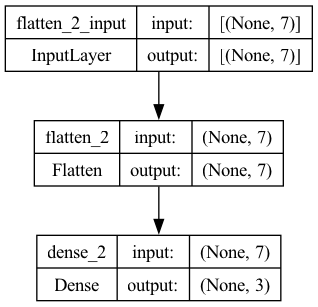

In [174]:
# modelling (다중 분류)

print ("records shape : ", df.iloc[0].shape)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(7, )), 
    keras.layers.Dense(3, activation='softmax')
])

model.summary()
keras.utils.plot_model(model, show_shapes=True)

In [175]:
# compile

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [177]:
# fit
# early stopping callback을 통하여 overfitting 방지

early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, 
                                                 restore_best_weights=True)

history = model.fit(X_train_scaled, y_train, epochs=100, 
                    validation_data=(X_val_scaled, y_val),
                   callbacks=[early_stopping_cb], 
                    verbose=True)

print (history.history)

Epoch 1/100
84/84 [==============================] - 0s 2ms/step - loss: 0.7734 - accuracy: 0.6396 - val_loss: 0.7856 - val_accuracy: 0.6263
Epoch 2/100
84/84 [==============================] - 0s 1ms/step - loss: 0.7730 - accuracy: 0.6381 - val_loss: 0.7856 - val_accuracy: 0.6263
Epoch 3/100
84/84 [==============================] - 0s 1ms/step - loss: 0.7728 - accuracy: 0.6377 - val_loss: 0.7856 - val_accuracy: 0.6338
Epoch 4/100
84/84 [==============================] - 0s 1ms/step - loss: 0.7728 - accuracy: 0.6366 - val_loss: 0.7853 - val_accuracy: 0.6308
Epoch 5/100
84/84 [==============================] - 0s 1ms/step - loss: 0.7726 - accuracy: 0.6359 - val_loss: 0.7854 - val_accuracy: 0.6308
Epoch 6/100
84/84 [==============================] - 0s 1ms/step - loss: 0.7727 - accuracy: 0.6366 - val_loss: 0.7855 - val_accuracy: 0.6308
Epoch 7/100
84/84 [==============================] - 0s 1ms/step - loss: 0.7725 - accuracy: 0.6377 - val_loss: 0.7851 - val_accuracy: 0.6293
Epoch 8/100
8

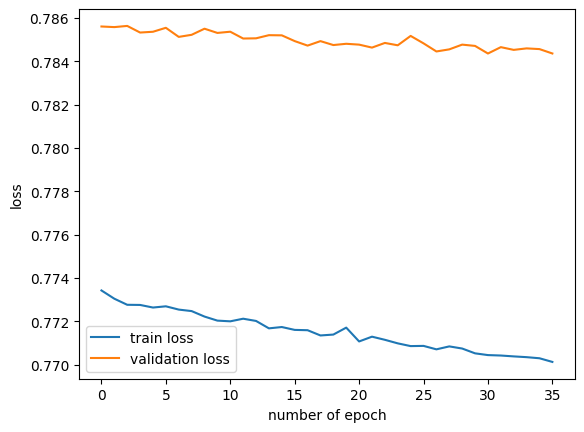

In [178]:
# loss 시각화

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('number of epoch')
plt.ylabel('loss')
plt.legend (['train loss', 'validation loss'])
plt.show() 

In [179]:
# evaluate

model.evaluate(X_val_scaled, y_val)

21/21 [==============================] - 0s 1ms/step - loss: 0.7844 - accuracy: 0.6308


[0.7843595147132874, 0.6307922005653381]

In [180]:
# confusion matrix 및 report
# validation dataset과 test dataset을 따로 report 및 matrix drawing


y_val_pred = model.predict(X_val_scaled )
y_test_pred = model.predict(X_test_scaled)

y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

############

cm_val = confusion_matrix(y_val_en, y_val_pred_classes)
print ("- validation data confusion matrix -\n")
print (cm_val)

print ('\n --------------- \n')

cm_test = confusion_matrix(y_test_en, y_test_pred_classes)
print ("- test data confusion matrix -\n")
print (cm_test)

print ('\n --------------- \n')

cr_val = classification_report(y_val_en, y_val_pred_classes)
print ("- validation data report of classification -\n")
print (cr_val)

print ('\n --------------- \n')

cr_test = classification_report(y_test_en, y_test_pred_classes)
print ("- test data report of classification -\n")
print (cr_test)

print ('\n --------------- \n')

27/27 [==============================] - 0s 1ms/step
- validation data confusion matrix -

[[180  34  11]
 [ 64  93  55]
 [ 25  58 149]]

 --------------- 

- test data confusion matrix -

[[231  46   4]
 [ 72 117  76]
 [ 28  59 203]]

 --------------- 

- validation data report of classification -

              precision    recall  f1-score   support

           0       0.67      0.80      0.73       225
           1       0.50      0.44      0.47       212
           2       0.69      0.64      0.67       232

    accuracy                           0.63       669
   macro avg       0.62      0.63      0.62       669
weighted avg       0.62      0.63      0.62       669


 --------------- 

- test data report of classification -

              precision    recall  f1-score   support

           0       0.70      0.82      0.75       281
           1       0.53      0.44      0.48       265
           2       0.72      0.70      0.71       290

    accuracy                           0

-------

### 3. DNN 
- hidden layer을 충분히 구성하여 신경망을 struction할 것임
    - parameter는 최소한 15000개 이상으로 증폭, 각 node의 activation은 relu 사용
    - epoch는 100으로 고정
- 아래와 같이 experiment할 예정이다.
    - optimizer는 **적응형 학습율 optimizer인 adam을 사용한다.**
    - validation loss 감소를 위하여 **dropout 층을 추가 후, callback으로 early stopping을 도입**한다.
        - patiences는 10로 한다.

records shape :  (8,)
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 7)                 0         
                                                                 
 dense_27 (Dense)            (None, 256)               2048      
                                                                 
 dense_28 (Dense)            (None, 128)               32896     
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_29 (Dense)            (None, 64)                8256      
                                                                 
 dense_30 (Dense)            (None, 32)                2080      
                                                                 
 dropout_13 (Dropout)        (No

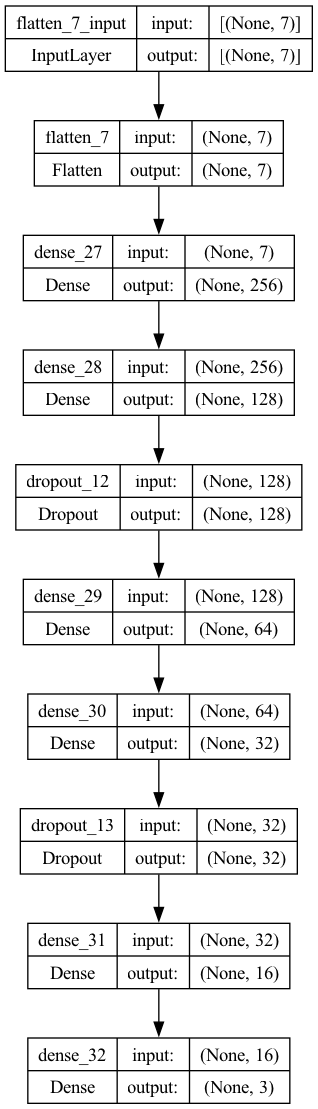

In [205]:
# modelling DNN

print ("records shape : ", df.iloc[0].shape)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(7, )), 
    keras.layers.Dense(256, activation='relu'), 
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.summary()
keras.utils.plot_model(model, show_shapes=True)

In [206]:
# compile

adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics='accuracy')

In [207]:
# callback 설정 및 fit

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, 
                                                 restore_best_weights=True)

history = model.fit(X_train_scaled, y_train, epochs=100, 
                    validation_data=(X_val_scaled, y_val), batch_size=18, 
                    callbacks=early_stopping_cb, verbose=True)

Epoch 1/100
149/149 [==============================] - 1s 3ms/step - loss: 0.8813 - accuracy: 0.5707 - val_loss: 0.8246 - val_accuracy: 0.6248
Epoch 2/100
149/149 [==============================] - 0s 2ms/step - loss: 0.8045 - accuracy: 0.6183 - val_loss: 0.7926 - val_accuracy: 0.6457
Epoch 3/100
149/149 [==============================] - 0s 2ms/step - loss: 0.7834 - accuracy: 0.6355 - val_loss: 0.7896 - val_accuracy: 0.6457
Epoch 4/100
149/149 [==============================] - 0s 2ms/step - loss: 0.7743 - accuracy: 0.6336 - val_loss: 0.7721 - val_accuracy: 0.6442
Epoch 5/100
149/149 [==============================] - 0s 2ms/step - loss: 0.7505 - accuracy: 0.6497 - val_loss: 0.7589 - val_accuracy: 0.6637
Epoch 6/100
149/149 [==============================] - 0s 2ms/step - loss: 0.7426 - accuracy: 0.6546 - val_loss: 0.7664 - val_accuracy: 0.6368
Epoch 7/100
149/149 [==============================] - 0s 2ms/step - loss: 0.7503 - accuracy: 0.6519 - val_loss: 0.7567 - val_accuracy: 0.6472

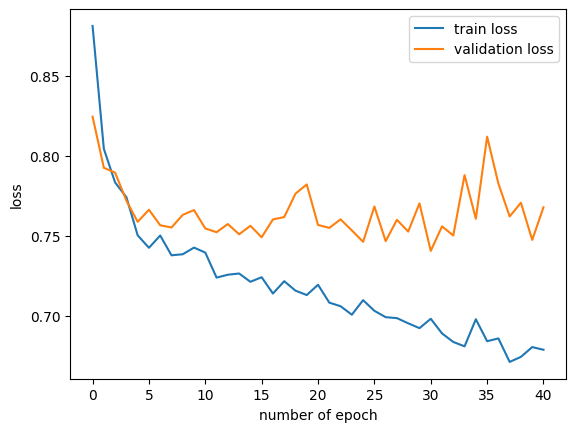

In [208]:
# loss 시각화

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('number of epoch')
plt.ylabel('loss')
plt.legend (['train loss', 'validation loss'])
plt.show() 

In [210]:
# evaluate

model.evaluate(X_val_scaled, y_val)

21/21 [==============================] - 0s 1ms/step - loss: 0.8182 - accuracy: 0.6143


[0.8182211518287659, 0.6143497824668884]

In [211]:
# confusion matrix 및 report
# validation dataset과 test dataset을 따로 report 및 matrix drawing


y_val_pred = model.predict(X_val_scaled )
y_test_pred = model.predict(X_test_scaled)

y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

############

cm_val = confusion_matrix(y_val_en, y_val_pred_classes)
print ("- validation data confusion matrix -\n")
print (cm_val)

print ('\n --------------- \n')

cm_test = confusion_matrix(y_test_en, y_test_pred_classes)
print ("- test data confusion matrix -\n")
print (cm_test)

print ('\n --------------- \n')

cr_val = classification_report(y_val_en, y_val_pred_classes)
print ("- validation data report of classification -\n")
print (cr_val)

print ('\n --------------- \n')

cr_test = classification_report(y_test_en, y_test_pred_classes)
print ("- test data report of classification -\n")
print (cr_test)

print ('\n --------------- \n')

27/27 [==============================] - 0s 1ms/step
- validation data confusion matrix -

[[169  46  10]
 [ 57 100  55]
 [ 19  71 142]]

 --------------- 

- test data confusion matrix -

[[222  49  10]
 [ 57 140  68]
 [ 19  66 205]]

 --------------- 

- validation data report of classification -

              precision    recall  f1-score   support

           0       0.69      0.75      0.72       225
           1       0.46      0.47      0.47       212
           2       0.69      0.61      0.65       232

    accuracy                           0.61       669
   macro avg       0.61      0.61      0.61       669
weighted avg       0.62      0.61      0.61       669


 --------------- 

- test data report of classification -

              precision    recall  f1-score   support

           0       0.74      0.79      0.77       281
           1       0.55      0.53      0.54       265
           2       0.72      0.71      0.72       290

    accuracy                           0